In [ ]:
pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import arviz as az
import pymc as pm

#**Calculating how many games FC Barcelona will win in LaLiga this season**

## Intro:

FC Barcelona is one of the most recognizable soccer clubs in the world. They've had superstar players like Lionel Messi and Neymar Jr. play for them, and have been one of the most successful teams in history (I myself am a huge fan of them). Throughout this reading, I'll use the Bayesian prediction model and beta+binomial distribution to find how many games of LaLiga they will win this season.

For those unaware of how league soccer works, it functions similar to any other sport. For LaLiga, the first division league for Spanish Soccer Clubs, each club plays 38 games across the year against 19 different opponents, playing each opponent twice. Once on their home turf and once on their opponent's stadium.

Each win will award the team 3 points, while a draw and loss will award the team 1 and 0 points respectively. We are focusing on the number of wins vs. non-wins, as winning games maximizes points and FC Barcelona's chances of finishing the league with the most points, winning a trophy.

FC Barcelona's been in controversy recently as their form has been dropping. They didn't win any trophies last season so I think this is an interesting study on whether they will win this certain trophy.

## Beta & Bayesian Statistics:

The Beta model fits this model because there is a fixed amount of games, and there is also while taking into consideration the potential uncertainty of the win probability. This proportion of wins to non-wins is something that we try to solve for in this analysis.

As we collect more data, we will change our posterior to take account of other historical datasets. For instance, the all time win to non win ratio in league style games of FC Barcelona (sneak peek).



## Prior:

For our initial prior, we'll keep it simple. We'll use the full historical data of FC Barcelona's LaLiga career. Taken from Wikipedia (https://en.wikipedia.org/wiki/List_of_FC_Barcelona_seasons#La_Liga_era), we see that Barcelona has played 3175 games in LaLiga, with 1864 wins and 1311 non-wins.


In [ ]:
Win_prior = pz.Beta(alpha=1864,beta=1311)

Win_prior_mode = (Win_prior.alpha - 1)/(Win_prior.alpha + Win_prior.beta - 2)

#the mean mean first, then median, and finally mode
Win_prior.mean(), Win_prior.median(), Win_prior_mode

(0.5870866141732284, 0.587104903030671, 0.5871415064607627)

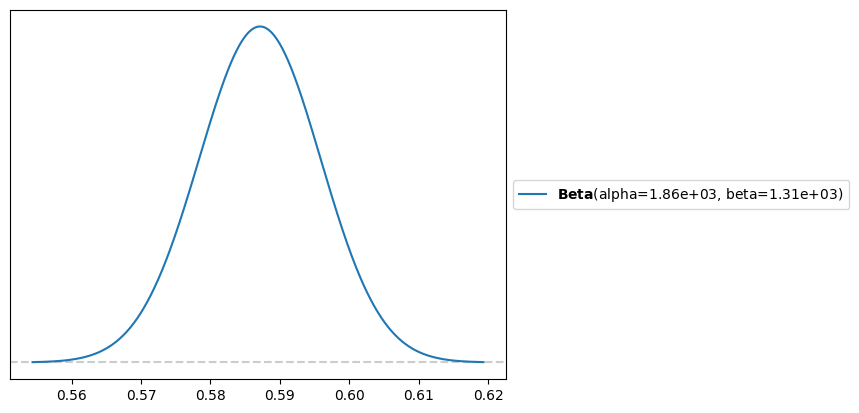

In [ ]:
#show the distribution curve
FT_prior = pz.Beta(alpha=1864,beta=1311).plot_pdf()


As we can see here, from our Beta distribution, we see the curve centers at around .587, showing that based on all of FC Barcelona's history, they'll win a proportion of 0.587 of theirs games, so it predicts about 22 wins this season.

---



## Likelihood - Post-First UCL Win FC Barcelona

I don't think its fair to approximate the # of games a club will win in the future based on their entire past. It's not fair to always calculate a Lakers vs Celtics playoff final because of their past success. Because of this, I will be focusing on the data post 1992, which is when they were first ranked #1 in Europe, by winning a competition called the UCL. I think this shows their newfound dominance that they have today. Before this turning point, they were more or less an average team.

Since the 1991/1992 Season which ended in their European championship, FC Barcelona have played 1224 matches and have won 786 games, not winning 438 times. But 1224 matches played is a lot lower than the 3000 played in their lifetime. And arguably, it has a lot more or equal value than their statistics in the 1970s. Because of this, I've scaled the likelihood to match the number of games FC Barcelona has played in their LaLiga history, matching the prior data. I think this will reflect how important each of the pieces of data is for our calculations.

3175/1224 = ~2.6 scale

Below is the scaled binomial distribution for our likelihood


<Axes: >

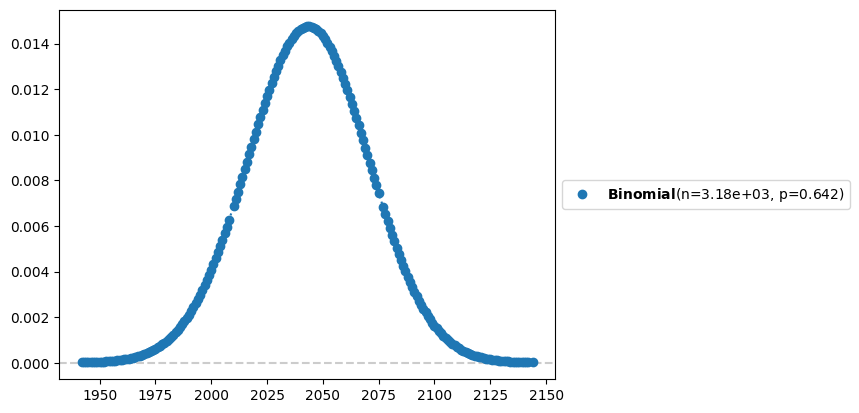

In [ ]:
pz.Binomial(n = 2.6 * 1224, p = 786/1224 ).plot_pdf() #times 2.6 for the scaling

Now we can use a PYMC bernoulli model.

## Posterior - Post-First UCL Win FC Barcelona

In [ ]:
import pymc as pm

In [ ]:
#the wins
wins = np.repeat(1, 2*786)

#the nonwins
nonwins = np.repeat(0, 2*438)

#combine
win_data = np.concatenate( [wins,nonwins] )



In [ ]:
with pm.Model() as wmby_FT_model:

  #Our Prior
  θ = pm.Beta('θ' , alpha = 1864 , beta = 1311)

  #Bernoulli Distr.
  y = pm.Bernoulli('y', p = θ, observed = win_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_win = pm.sample(1000)

<Axes: title={'center': 'θ'}>

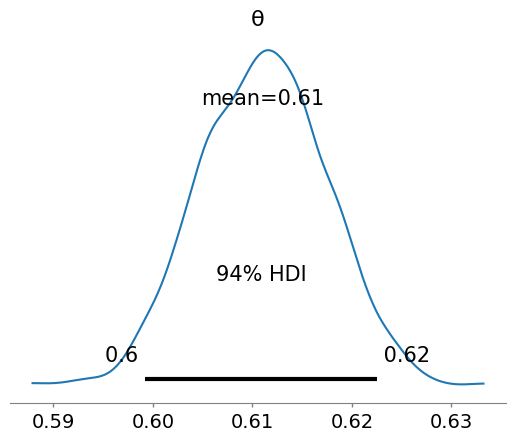

In [ ]:
az.plot_posterior(idata_win)

Here, due to the likelihood having a higher win-rate, we see the overall curve having a higher mean.

# Predicting Barcelona's Laliga 2024/2025 wins

Our model centered in at around 0.61. With this probability, we can run a practice 38 matches and see how many games FC Barcelona end up with this season. With this, we can use p = 0.61 for our prediction. 0.61 * 38 = ~23, so we can predict that FC Barcelona will win 23 games this season and not win 15 times. As opposed to my prior, we see an increase in the probability of winning a game. I think this is an accurate change we see in the posterior because compared to all-time FC Barcelona, which includes the 70+ years of it not being a superstar club, present day FC Barcelona seems to be in better shape and should win more games. Therefore, I think this is an accurate conclusion.